In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [16]:
df = pd.read_csv('StudentsPerformance.csv')

In [17]:
print(df[['math score', 'reading score', 'writing score']].describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [18]:
completed = df[df['test preparation course'] == 'completed']['math score']
none = df[df['test preparation course'] == 'none']['math score']

t_stat, p_val = ttest_ind(completed, none, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Statistically significant difference in math scores due to test preparation.")
else:
    print("No significant difference in math scores due to test preparation.")

T-statistic: 5.79
P-value: 0.000
Statistically significant difference in math scores due to test preparation.


In [19]:
edu_order = [
    "some high school",
    "high school",
    "associate's degree",
    "some college",
    "bachelor's degree",
    "master's degree"
]

edu_map = {level: i + 1 for i, level in enumerate(edu_order)}

df['education_num'] = df['parental level of education'].map(edu_map)

df_clean = df.dropna(subset=['education_num', 'writing score'])

X = sm.add_constant(df_clean['education_num'])
y = df_clean['writing score']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     53.77
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.65e-13
Time:                        14:26:54   Log-Likelihood:                -4113.2
No. Observations:                1000   AIC:                             8230.
Df Residuals:                     998   BIC:                             8240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.8013      1.094     55.560

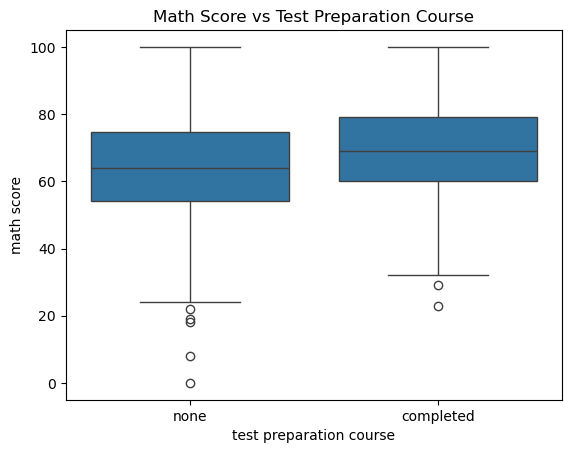

In [20]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score vs Test Preparation Course')
plt.show()

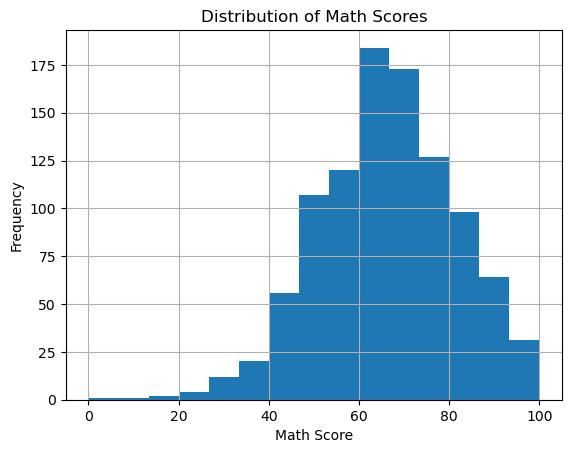

In [21]:
df['math score'].hist(bins=15)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

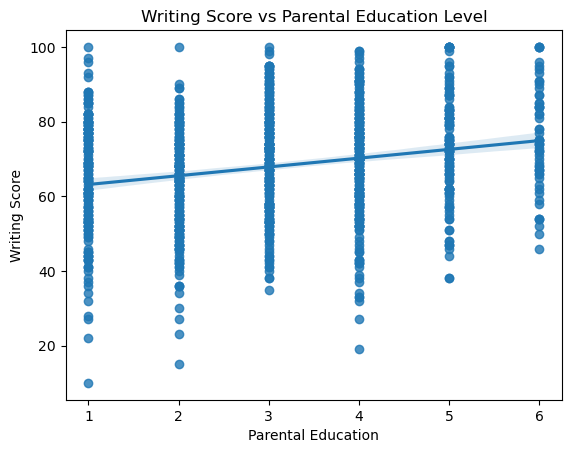

In [22]:
sns.regplot(x='education_num', y='writing score', data=df)
plt.title('Writing Score vs Parental Education Level')
plt.xlabel('Parental Education')
plt.ylabel('Writing Score')
plt.show()